In [1]:
from PIL import Image

In [6]:
# img = Image.open(r'C:\Users\dkglt\Desktop\CNN\datasets\flower_photo\flower_photos\roses\873660804_37f5c6a46e_n.jpg')
# crop_img = img.crop((125,125,350,350))
# crop_img.show()

random erasing/cutout - cutout randomly mask out sqaure region of input during training

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # 

In [16]:
def cutout(img, size=50):
    h, w = img.shape[:2]
    y = np.random.randint(h)
    x = np.random.randint(w)
    y1 = np.clip(y - size // 2, 0, h)
    y2 = np.clip(y + size // 2, 0, h)
    x1 = np.clip(x - size // 2, 0, w)
    x2 = np.clip(x + size // 2, 0, w)
    img_copy = img.copy()  # To prevent modifying the original image
    img_copy[y1:y2, x1:x2] = 0  # Set region to black
    return img_copy

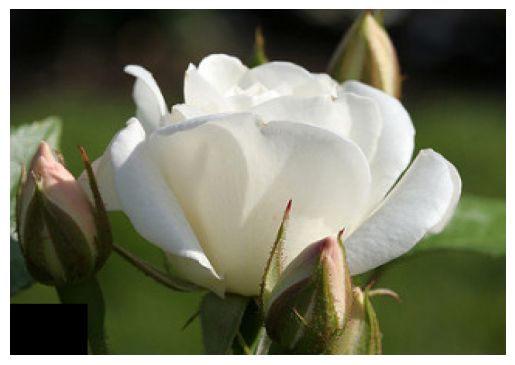

In [18]:
img = cv2.imread(r'C:\Users\dkglt\Desktop\CNN\datasets\flower_photo\flower_photos\roses\873660804_37f5c6a46e_n.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Apply cutout
aug_img = cutout(img, size=50)

# Display the augmented image
plt.imshow(aug_img)
plt.axis('off')
plt.show()

colour transformation

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
img = tf.keras.preprocessing.image.load_img(r'C:\Users\dkglt\Desktop\CNN\datasets\flower_photo\flower_photos\roses\873660804_37f5c6a46e_n.jpg')
img_arry = tf.keras.preprocessing.image.img_to_array(img)
img_arry = np.expand_dims(img_arry,0)

In [26]:
datagen = ImageDataGenerator(
    brightness_range = (0.8,1.2)
)

In [27]:
aug_img = datagen.flow(img_arry,batch_size=1)

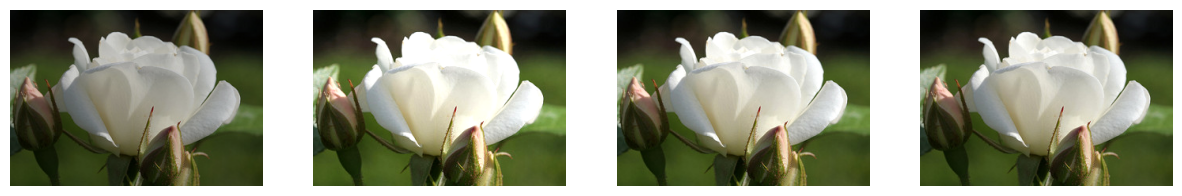

In [29]:
#plot some augmented img 
fig, axes = plt.subplots(1,4,figsize=(15,15))
axes = axes.flatten()
for i in range(4):
    batch = next(aug_img)
    augmented_img = batch[0].astype('uint8')
    axes[i].imshow(augmented_img)
    axes[i].axis('off')

plt.show()